<a href="https://colab.research.google.com/github/harsh-jaiswal13/MACHINE_Learning/blob/main/mileage%20prediction%20using%20neural%20netwoks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
import pandas as pd


In [6]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [7]:
df=raw_dataset.dropna()

In [8]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [11]:
df.shape

(392, 8)

In [12]:
import seaborn as sns

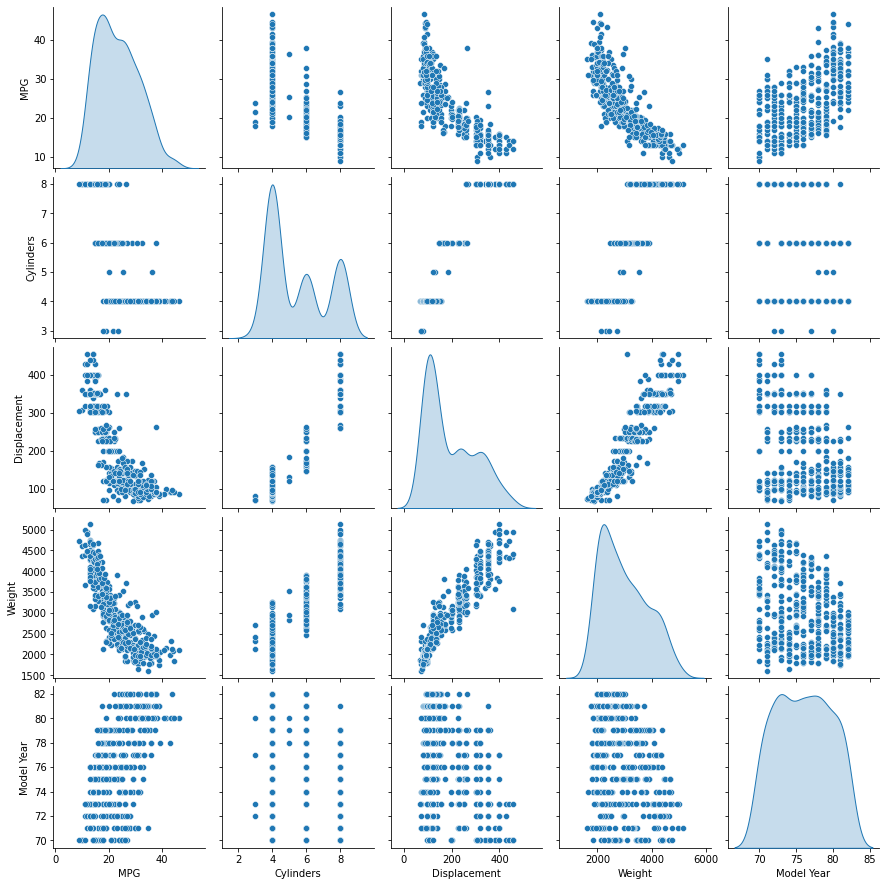

In [17]:

sns.pairplot(df[['MPG', 'Cylinders', 'Displacement', 'Weight',"Model Year"]], diag_kind='kde')

In [20]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [23]:
X=df.drop(columns='MPG')

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [26]:
from sklearn.model_selection import train_test_split
# sklearn.model_selection.train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df['MPG'], test_size=0.33, random_state=42)
# X=
# y=df['Price']

In [27]:
X.shape

(392, 7)

In [91]:
callback=keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [85]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=7))
model.add(Dense(11,activation='relu'))
model.add(Dense(7,activation='relu'))

model.add(Dense(1,activation='relu'))

In [93]:
model.compile(optimizer='Adam',loss='MeanSquaredError',metrics=['mse'])

In [95]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2,callbacks=callback)

Epoch 1/100
5/5 [==============================] - 1s 51ms/step - loss: 11.3673 - mse: 11.3673 - val_loss: 15.6289 - val_mse: 15.6289
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 11.1254 - mse: 11.1254 - val_loss: 15.3906 - val_mse: 15.3906
Epoch 3/100
5/5 [==============================] - 0s 11ms/step - loss: 10.9815 - mse: 10.9815 - val_loss: 15.0676 - val_mse: 15.0676
Epoch 4/100
5/5 [==============================] - 0s 16ms/step - loss: 10.8885 - mse: 10.8885 - val_loss: 14.8266 - val_mse: 14.8266
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 10.7678 - mse: 10.7678 - val_loss: 14.6005 - val_mse: 14.6005
Epoch 6/100
5/5 [==============================] - 0s 10ms/step - loss: 10.7120 - mse: 10.7120 - val_loss: 14.3840 - val_mse: 14.3840
Epoch 7/100
5/5 [==============================] - 0s 10ms/step - loss: 10.5496 - mse: 10.5496 - val_loss: 14.0915 - val_mse: 14.0915
Epoch 8/100
5/5 [==============================] - 0s 17ms/ste

In [96]:
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))


5/5 [==============================] - 0s 3ms/step
9.392468672971292


In [97]:
y_pred= y_pred.argmax(axis=-1)


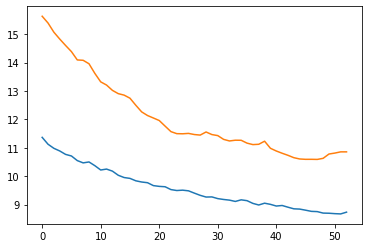

In [98]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

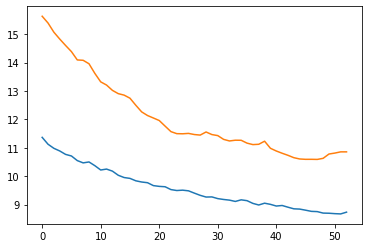

In [99]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])

In [79]:
from sklearn.metrics import mean_squared_error

21.44530956726535
